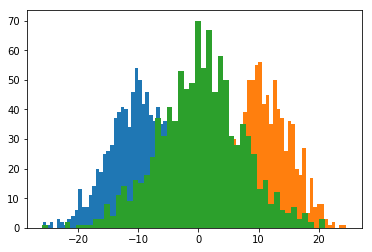

The mean of the sum is: 0.34913336396
The variance of the sum is: 48.577546012


In [1]:
#Python Code for Lab1

#by Pratyush Singh (pks629) and George Doykan (gd7448)

#Problem 1
import numpy as np
import matplotlib.pyplot as plt

#creating the distributions
mean = -10
std = 5
distribution_one = np.random.normal(mean, std, 1000)
plt.hist(distribution_one, 50)

mean = 10
distribution_two = np.random.normal(mean, std, 1000)
plt.hist(distribution_two, 50)

#sum the 2 normal distributions
distributionSum = distribution_one + distribution_two
plt.hist(distributionSum, 50)

plt.show()

print("The mean of the sum is: " + str(np.mean(distributionSum)))
print("The variance of the sum is: " + str(np.var(distributionSum)))

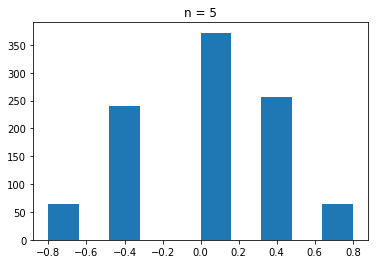

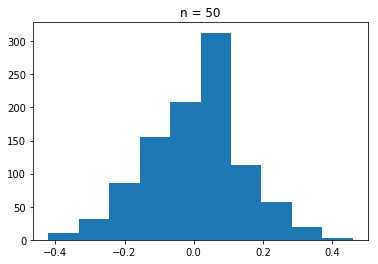

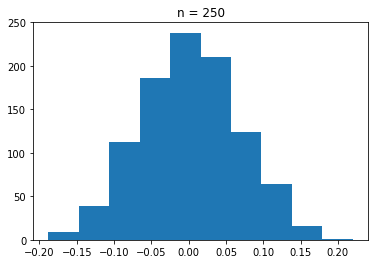

In [28]:
#Problem 2
X = [-1,1]
Z = []
Z1 = []
Z2 = []

for i in range(1, 1000):
    sum = 0
    sum1 = 0
    sum2 = 0
    for j in range(1, 250):
        bernoulli = np.random.choice(a=X, p=[.50,.50])
        sum = sum + bernoulli
    Z.append(sum/250)
    
    for k in range(1, 5):
        bern = np.random.choice(a=X, p=[.50,.50])
        sum1 = sum1 + bern
    Z1.append(sum1/5)
    
    for l in range(1, 50):
        b = np.random.choice(a=X, p=[.50,.50])
        sum2 = sum2 + b
    Z2.append(sum2/50)
    

#print(Z)
plt.hist(Z1)
plt.title("n = 5")
plt.show()
plt.hist(Z2)
plt.title("n = 50")
plt.show()
plt.hist(Z)
plt.title("n = 250")
plt.show()

In [29]:
#Problem 3
x = np.random.normal(0, 5, 25000)

#mean
sum = np.sum(x)
average = sum/25000
print("The average is: " + str(average))

#std
diff = 0
for i in x:
    temp = i - average
    temp = temp ** 2
    diff = diff + temp

std = (diff/(25000 - 1)) ** 0.5 #take the square root
print("The standard deviation: " + str(std))




The average is: 0.0142500652467
The standard deviation: 4.98379361444


The estimated mean for x vals is: -4.95178856717
The estimated mean for the y vals is: 4.93243286274
The estimated covariance is: 0.912986137926


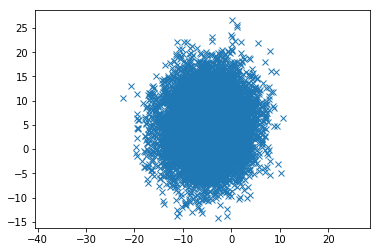

In [30]:
#Problem 4
mean = [-5, 5]
cov = [[20, 0.8], [0.8, 30]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

#estimating mean for x
sum_x = np.sum(x)
average_x = sum_x/10000
print("The estimated mean for x vals is: " + str(average_x))

#estimating mean for y
sum_y = np.sum(y) 
average_y = sum_y/10000
print("The estimated mean for the y vals is: " + str(average_y))

#calculate covariance
sum = 0
for i in range(0, 10000):
    sum = sum + ((x[i] - average_x) * (y[i] - average_y))

cov = 1/(10000 - 1) * sum
print("The estimated covariance is: " + str(cov))

plt.plot(x, y, 'x')
plt.axis('equal')
plt.show()

In [8]:
#Problem 5
import pandas as pd
import numpy as np

patientDF = pd.read_csv('/Users/pratyushsingh/Data Science Lab EE379K/PatientData.csv', header=None, na_values=["?"])

#data exploration to figure the features for the 
print(patientDF.info())

print()
print()

print("The max for the first column: " + str(np.max(patientDF[0])))
print("The min for the first column: " + str(np.min(patientDF[0])))
print("The average for the first column: " + str(np.mean(patientDF[0])))

print()
print()

print("The max for the third column: " + str(np.max(patientDF[2])))
print("The min for the third column: " + str(np.min(patientDF[2])))
print("The average for the third column: " + str(np.mean(patientDF[2])))
print("The median for the third column: " + str(np.median(patientDF[2])))
index  = patientDF[2].idxmax()
minIndex = patientDF[2].idxmin()
print("The age for the patient with the max value in the third column: " 
      + str(patientDF.iloc[index][0]))
print("The age for the patient with the min value in the third column: " 
      + str(patientDF.iloc[minIndex][0]))

print()
print()

print("The max for the fourth column: " + str(np.max([3])))
print("The min for the fourth column: " + str(np.min(patientDF[3])))
print("The average for the fourth column: " + str(np.mean(patientDF[3])))
print("The median for the fourth column: " + str(np.median(patientDF[3])))
index  = patientDF[3].idxmin()
maxIndex = patientDF[3].idxmax()
print("The age for the patient with the min value in the fourth column: " 
      + str(patientDF.iloc[index][0]))
print("The age for the patient with the max value in the fourth column: " 
      + str(patientDF.iloc[maxIndex][0]))
print("The gender for the patient with the max value in the fourth column: " 
      + str(patientDF.iloc[maxIndex][1]))

#5c missing values
null_data = patientDF[patientDF.isnull().any(axis=1)] #rows with missing data
patientDF = patientDF.fillna(patientDF.mean()) #fill missing values with average

#finding the values with the three highest correlations
firstCorr = secondCorr = thirdCorr = float('-Inf')
first = second = third = float('-Inf')

for i in range(0, 279):
    corr = patientDF[i].corr(patientDF[279])
    if(corr > firstCorr):
        thirdCorr = secondCorr
        secondCorr = firstCorr
        firstCorr = corr
        third = second
        second = first
        first = i
    elif(corr > secondCorr):
        third = second
        thirdCorr = secondCorr
        secondCorr = corr
        second = i
    elif(corr > thirdCorr):
        thirdCorr = corr
        third = i
print()
print()

#the columns with the three highest correlated features
print("The columns with the three highest correlated features are: " + str(first) + ', ' + str(second) + ', ' + 
      str(third))
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 280 entries, 0 to 279
dtypes: float64(125), int64(155)
memory usage: 988.8 KB
None


The max for the first column: 83
The min for the first column: 0
The average for the first column: 46.4712389380531


The max for the third column: 780
The min for the third column: 105
The average for the third column: 166.18805309734512
The median for the third column: 164.0
The age for the patient with the max value in the third column: 1.0
The age for the patient with the min value in the third column: 3.0


The max for the fourth column: 3
The min for the fourth column: 6
The average for the fourth column: 68.17035398230088
The median for the fourth column: 68.0
The age for the patient with the min value in the fourth column: 1.0
The age for the patient with the max value in the fourth column: 53.0
The gender for the patient with the max value in the fourth column: 0.0


The columns with the three highest correlated f